#C1

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
data = pd.read_csv('/content/all-data.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()

sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_2.groupby('sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sentiment')
_ = plt.ylabel('text')

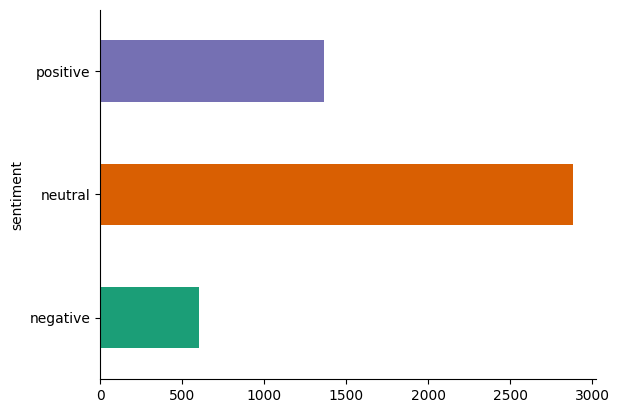

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'between', 'wouldn', 'that', 'same', 'there', '.', 'your', 'myself', 'are', 'further', 'those', 'won', 'be', 'aren', 'hasn', "weren't", '%', "you'd", 'when', 'but', 'my', 'what', 'now', "hasn't", "she's", '$', "mightn't", 'you', 'o', "you'll", 'no', '~', "wouldn't", 'themselves', 'each', 'here', '?', 'she', 'once', 'ours', 'can', "haven't", 'nor', "shan't", 'how', '@', '^', 'with', 'himself', 'too', "shouldn't", 'he', 'his', 'the', "mustn't", ']', 'over', "don't", ';', "you've", 'does', 'doesn', 'hers', 't', "doesn't", '`', 'at', 'very', 'needn', 'being', 'do', 'ourselves', 'd', 's', '[', 'm', 'below', 'wasn', "wasn't", "hadn't", 'such', 'than', 'own', 'her', 'couldn', 'an', 'll', "isn't", 'this', 'had', 'yours', 'in', 'if', ',', "couldn't", 'theirs', 'me', 'them', 'isn', 'for', '\\', 'just', 'our', 'about', 'most', 'has', 'against', 'few', 'doing', 'yourselves', 'other', 'weren', '!', 'out', '>', 'to', "should've", "needn't", 'him', 'before', 'under', 'off', 'again', '-', "aren't", '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data.head()

sentiment                                               text
0   neutral  According Gran company plan move production Ru...
1   neutral  Technopolis plan develop stage area less 100,0...
2  negative  international electronic industry company Elco...
3  positive  new production plant company would increase ca...
4  positive  According company 's update strategy year 2009...

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

In [ ]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

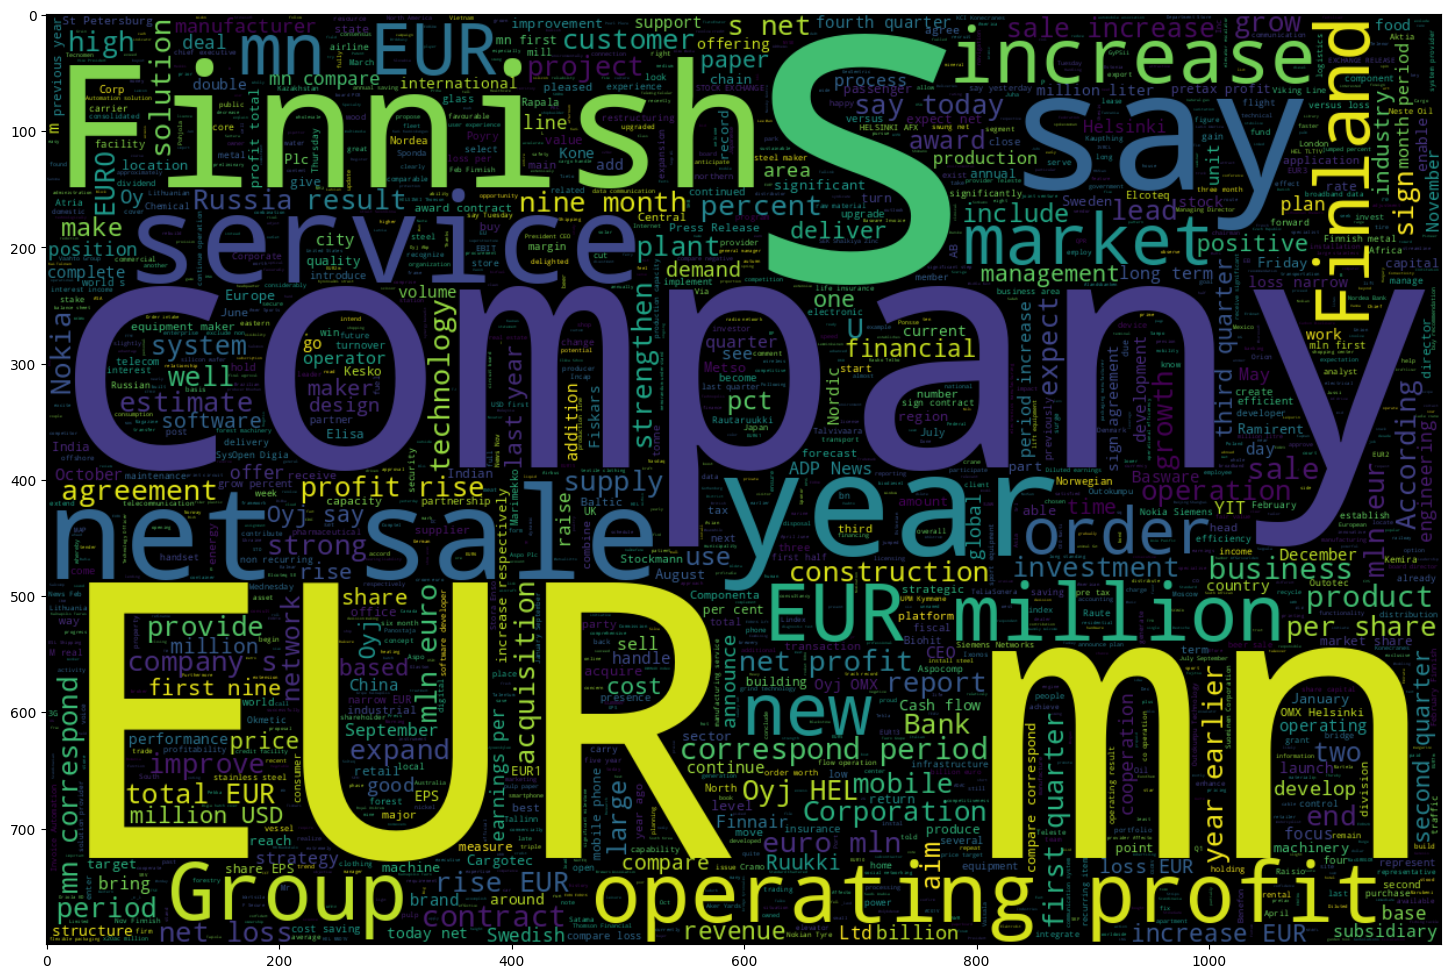

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

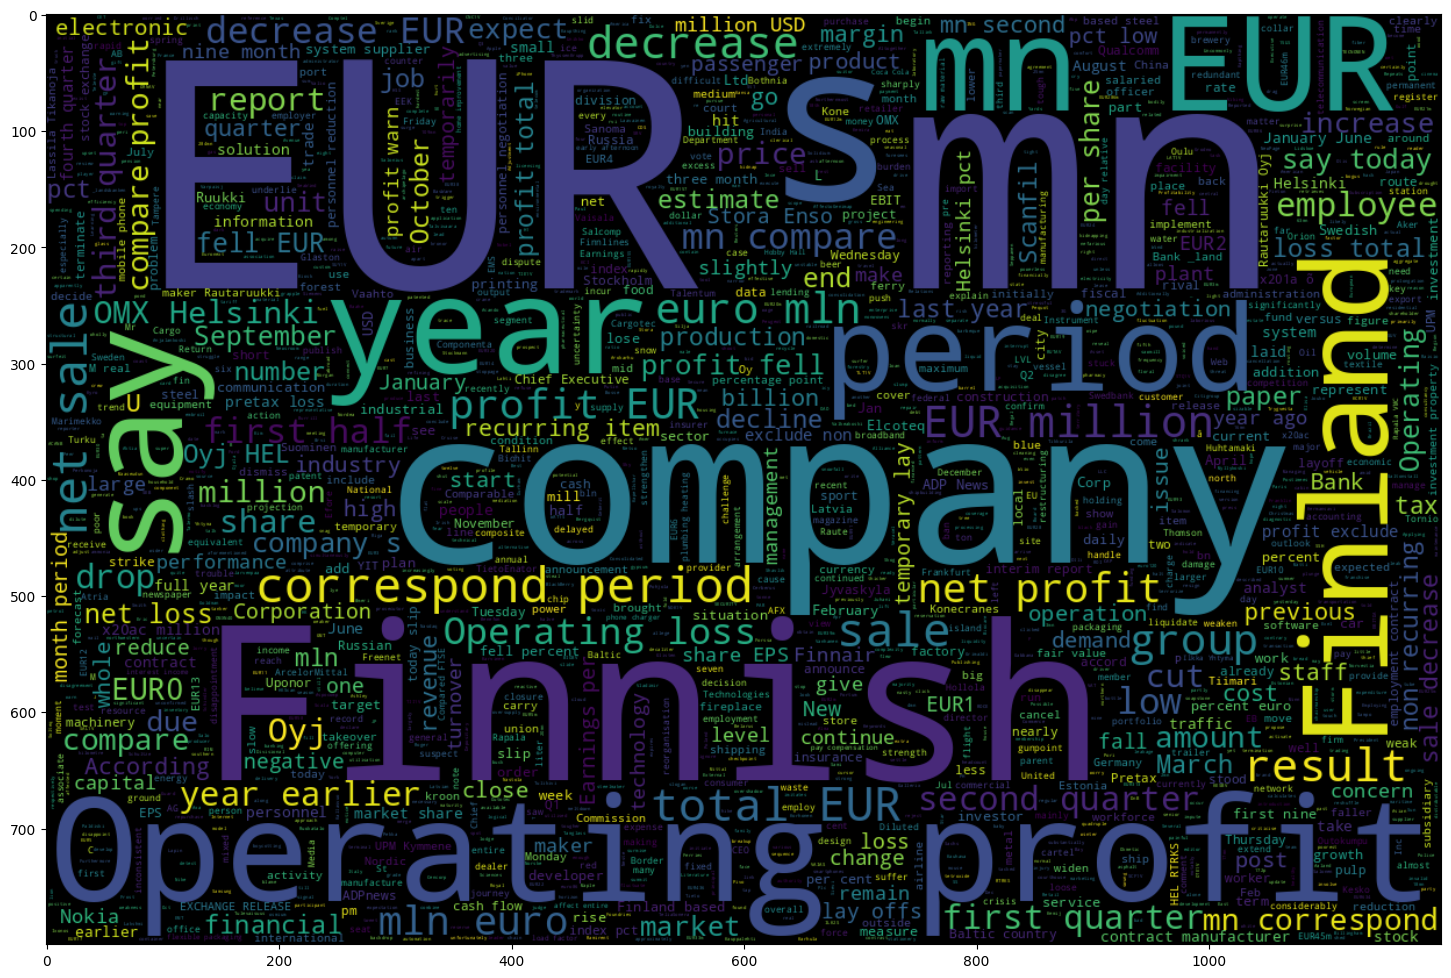

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with negative Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

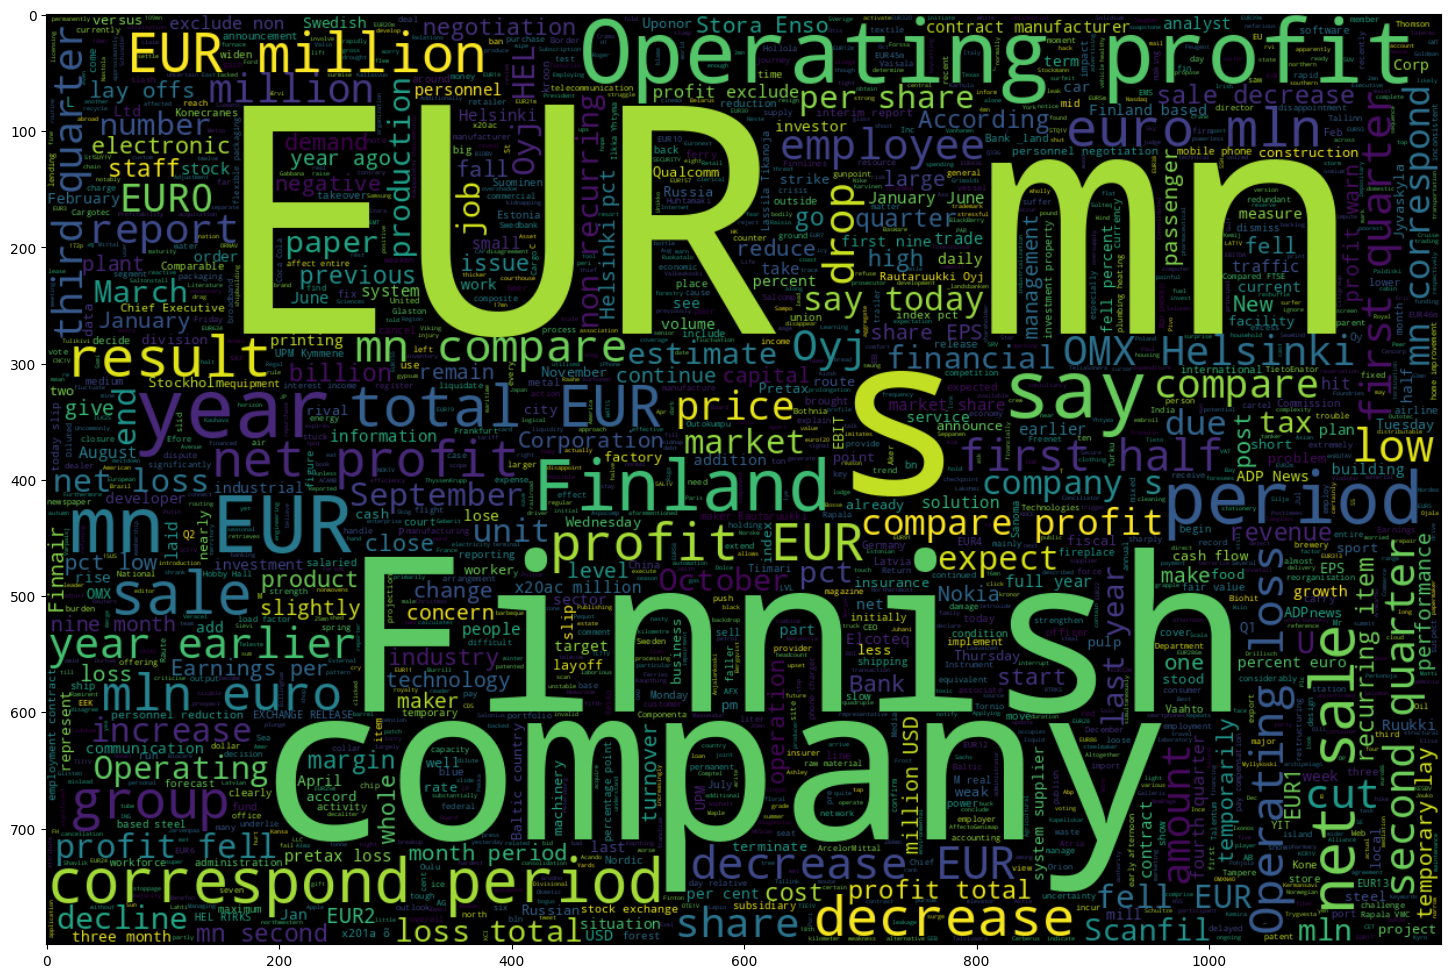

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [ ]:
# creating a variable for count vectorizer which gives us features using the whole text of data.
count_vec = CountVectorizer(max_features=4000, ngram_range=(1,2), max_df=0.9, min_df=0.0)
# max_df insures to remove most frequent words
# ngram_range is used to select words at a time like 1 or 2 like if a sentence have 'not happy' in text then it can mean two things if we pick the word 'happy' and pick the words 'not happy' both

In [ ]:
x_train_features = count_vec.fit_transform(x_train).todense()
x_test_features = count_vec.transform(x_test).todense()
x_train_features.shape, x_test_features.shape

((3876, 4000), (970, 4000))

1. Multinomial NaiveBayes

In [ ]:
import numpy as np

x_train_features = np.asarray(x_train_features)
x_test_features = np.asarray(x_test_features)

nb_clf = MultinomialNB()
nb_clf.fit(x_train_features, y_train)

y_pred = nb_clf.predict(x_test_features)
print(accuracy_score(y_test, y_pred) * 100)


71.1340206185567


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.52      0.54      0.53       128
     neutral       0.76      0.87      0.81       575
    positive       0.66      0.46      0.54       267

    accuracy                           0.71       970
   macro avg       0.65      0.62      0.63       970
weighted avg       0.70      0.71      0.70       970



2. Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_features, y_train)
y_pred = lr.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

75.6701030927835


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.52      0.59       128
     neutral       0.78      0.88      0.83       575
    positive       0.70      0.60      0.65       267

    accuracy                           0.76       970
   macro avg       0.73      0.67      0.69       970
weighted avg       0.75      0.76      0.75       970



3. Simple Vector Machines

In [ ]:
svc = SVC()
svc.fit(x_train_features, y_train)
y_pred = svc.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

72.78350515463917


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.26      0.39       128
     neutral       0.72      0.97      0.82       575
    positive       0.77      0.42      0.55       267

    accuracy                           0.73       970
   macro avg       0.76      0.55      0.59       970
weighted avg       0.74      0.73      0.69       970



4. Neural Network with Keras

In [ ]:
y_train[y_train=='positive']=2
y_train[y_train=='neutral']=1
y_train[y_train=='negative']=0
y_test[y_test=='positive']=2
y_test[y_test=='neutral']=1
y_test[y_test=='negative']=0

encoder = OneHotEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((3876, 3), (970, 3))

In [ ]:
def fit_model(optimizer):
    model = Sequential()

    model.add(Dense(units=512, activation='relu', input_dim=x_train_features.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=100, verbose=0)

    print('Accuracy with',optimizer,'optimizer is :',model.evaluate(x_test_features, y_test)[1]*100)

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.title('opt='+optimizer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7587 - loss: 0.9498
Accuracy with sgd optimizer is : 75.56701302528381
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 2.3882
Accuracy with rmsprop optimizer is : 74.32989478111267
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7293 - loss: 0.6301
Accuracy with adagrad optimizer is : 73.81443381309509
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7328 - loss: 3.0089
Accuracy with adam optimizer is : 72.47422933578491


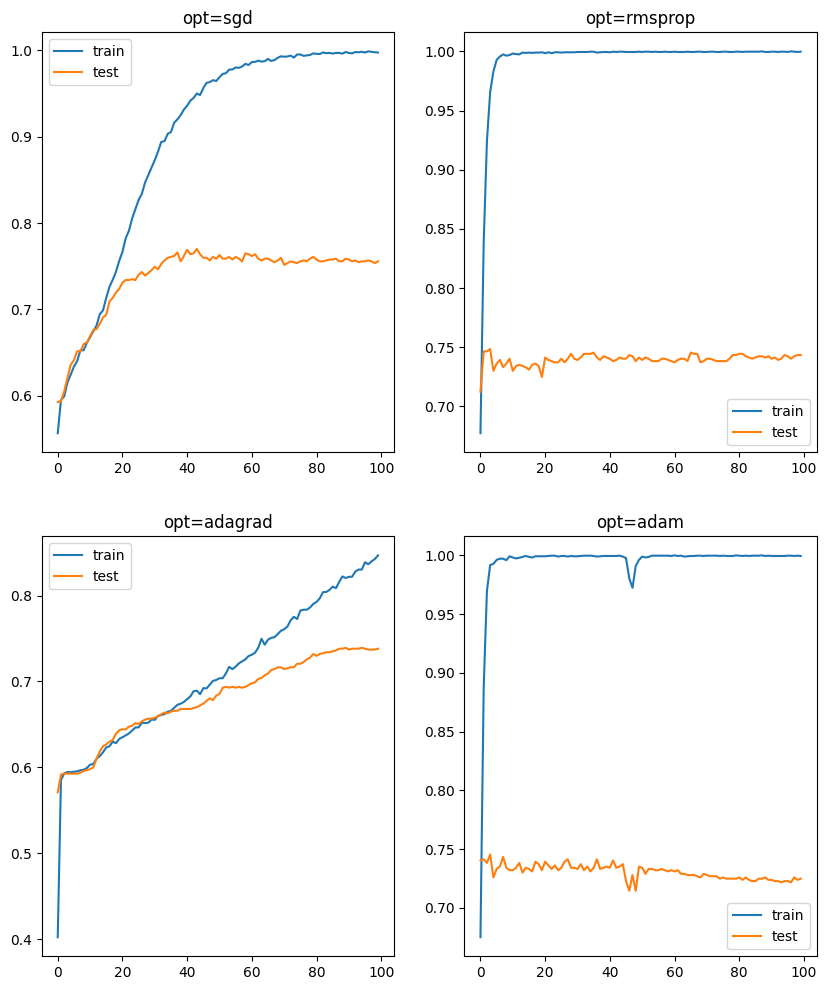

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
plt.figure(figsize=(10,12))
for i in range(len(optimizers)):

    plot_no = 220 + (i+1)
    plt.subplot(plot_no)

    fit_model(optimizers[i])

plt.show()

#C2

In [ ]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# DataFrame display settings
pd.set_option('display.max_colwidth', 250)

In [ ]:
# Charts display settings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 11})

In [ ]:
for dirname, _, filenames in os.walk('/content/all-data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/all-data.csv',
                   header=None,
                   names=['sentiment', 'text'],
                   encoding='latin-1',
                   dtype={'sentiment': 'category'})

In [ ]:
# Number of rows and columns
data.shape

(4846, 2)

In [ ]:

data.head()

sentiment  \
0   neutral   
1   neutral   
2  negative   
3  positive   
4  positive   

                                                                                                                                                                                                                                   text  
0                                                                                                       According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
1                                        Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .  
2  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .  
3                        With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .  
4                           According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .

In [ ]:

classes_distribution = data['sentiment'].value_counts(normalize=True)
classes_distribution

sentiment
neutral     0.594098
positive    0.281263
negative    0.124639
Name: proportion, dtype: float64

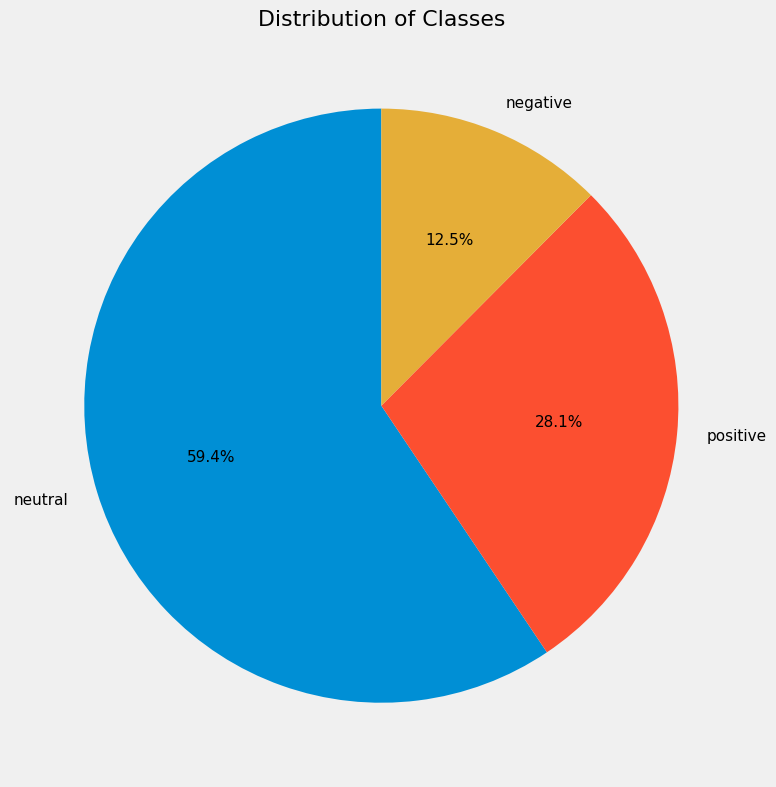

In [ ]:
labels = classes_distribution.index
values = classes_distribution.values
plt.pie(values, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.tight_layout()
plt.show()

In [ ]:
# Headlines length
data['n_words'] = data['text'].str.split()  # Split sentences by spaces and convert into lists of words
data['n_words'] = data['n_words'].apply(lambda x: [word for word in x if len(word) > 1])  # Remove words shorter than 2 characters
data['n_words'] = data['n_words'].apply(lambda x: len(x))

In [ ]:
# Length statistics
min_length = data['n_words'].min()
max_length = data['n_words'].max()
mean_length = data['n_words'].mean()
median_length = data['n_words'].median()

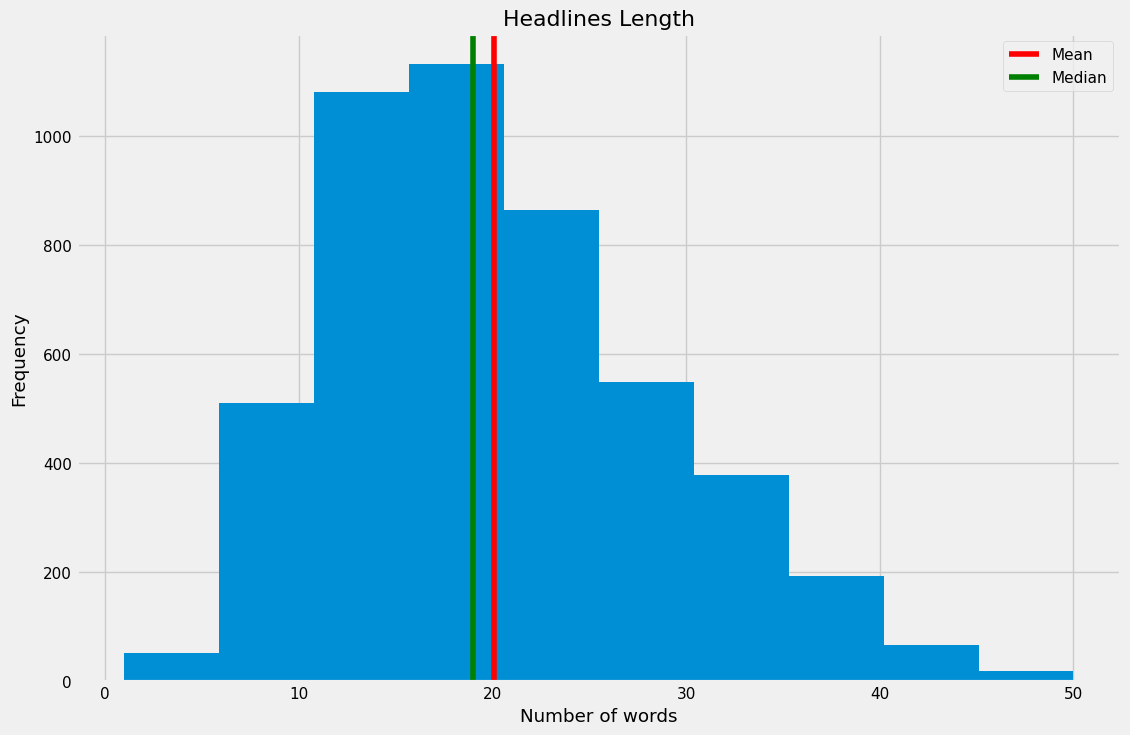

In [ ]:
plt.hist(data['n_words'], bins=10)
plt.axvline(mean_length, color='red', label='Mean')
plt.axvline(median_length, color='green', label='Median')
plt.legend()
plt.title('Headlines Length')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(f'Sentence length: {min_length} - {max_length} words\nMean length = {mean_length}\nMedian length = {median_length}')

Sentence length: 1 - 50 words
Mean length = 20.103796945934793
Median length = 19.0


In [ ]:
# Examples of the shortest headlines
data[data['n_words'] < 5]

sentiment                                     text  n_words
176   positive               Cargo volume grew by 7 % .        4
1023   neutral                        All are welcome .        3
1116   neutral                                Welcome !        1
1461   neutral                 You are warmly welcome !        4
1648  positive                 The pipeline is strong .        4
2399   neutral                    All rights reserved .        3
2518   neutral                    Net investment income        3
2554   neutral               Registration is required .        3
2569   neutral                          Status : Agreed        2
2972   neutral          Investments are not disclosed .        4
2983   neutral                              It 's not .        3
3040   neutral                     ND = Not disclosed .        3
3061   neutral                           NWC ANALYSIS :        2
3099   neutral                             R&D Loan ) .        2
3151   neutral               Terms were not disclosed .        4
3435   neutral    Uncertainties still exist , however .        4
3450   neutral                          What we think ?        3
3464   neutral                      You 're not alone .        4
3521   neutral               All depends on financing .        4
3720   neutral                  pct lower at 4,442.10 .        4
4228   neutral             Rapala Fishing Frenzy 2009 .        4
4715  negative  Subscription sales decreased slightly .        4

from matplotlib import pyplot as plt
_df_0['n_words'].plot(kind='hist', bins=20, title='n_words')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['n_words'].plot(kind='line', figsize=(8, 4), title='n_words')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def classification_heatmap(cm):
    """Function produces a heatmap based on the confusion matrix."""
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def accuracy_estimator(model, name):
    """Function evaluates accuracy metrics for classification model."""
    # Prediction on the test data
    y_pred_class = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_class)
    print(f'{name} model accuracy: {acc}')

    conf_matrix = confusion_matrix(y_test, y_pred_class)
    classes_names = le.classes_
    columns = ['pred_' + name for name in classes_names]
    indexes = ['actual_' + name for name in classes_names]
    conf_matrix = pd.DataFrame(conf_matrix, columns=columns, index=indexes)
    classification_heatmap(conf_matrix)

    cls_report = classification_report(y_test, y_pred_class, target_names=classes_names)
    print(cls_report)

    try:
        y_pred_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
        print(f'ROC AUC = {roc_auc}')
    except Exception as e:
        print('Probability estimations and ROC AUC are not available.')

In [ ]:
def sentiment_reader(model, name):
    """Function creates a pipeline that includes preprocessing steps
    and a classifier, fits the model on the training data and
    calls a function to estimate classification accuracy on the test data."""
    pipe = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 3), max_df=0.8)),  # Transform text into tokens using individual words, pairs and triplets
        ('tfidf', TfidfTransformer()),  # Take into account word frequency
        ('clf', model)  # Classification model passed to the function
    ])
    pipe.fit(X_train, y_train)
    accuracy_estimator(pipe, name)

In [ ]:
# Transform categories into numbers
le = LabelEncoder()
y = le.fit_transform(data['sentiment'])
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
# Withhold 20% of the original data for test purposes.
# Take into account class imbalances during the split stratifying the data accoording to y labels.
X_train, X_test, y_train, y_test = train_test_split(data['text'],
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

NaiveBayes model accuracy: 0.6690721649484536


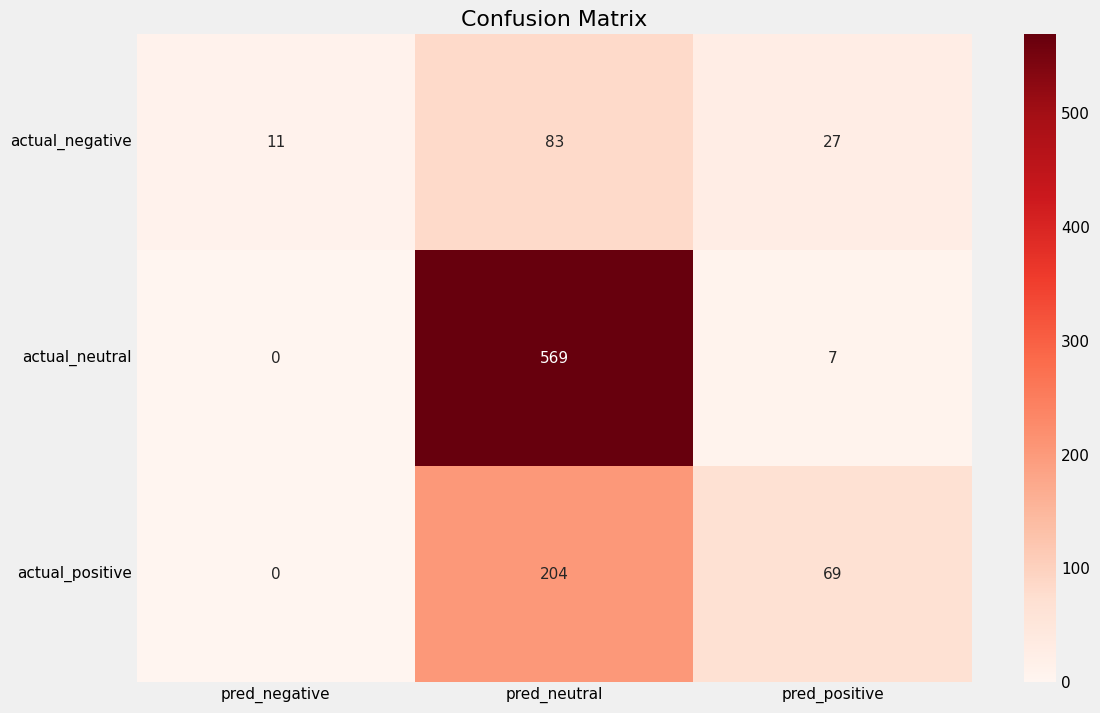

              precision    recall  f1-score   support

    negative       1.00      0.09      0.17       121
     neutral       0.66      0.99      0.79       576
    positive       0.67      0.25      0.37       273

    accuracy                           0.67       970
   macro avg       0.78      0.44      0.44       970
weighted avg       0.71      0.67      0.60       970

ROC AUC = 0.7975707742815074


In [ ]:
# Create and evaluate NaiveBayes model with base parameters.
sentiment_reader(MultinomialNB(), 'NaiveBayes')

LogisticRegression model accuracy: 0.7453608247422681


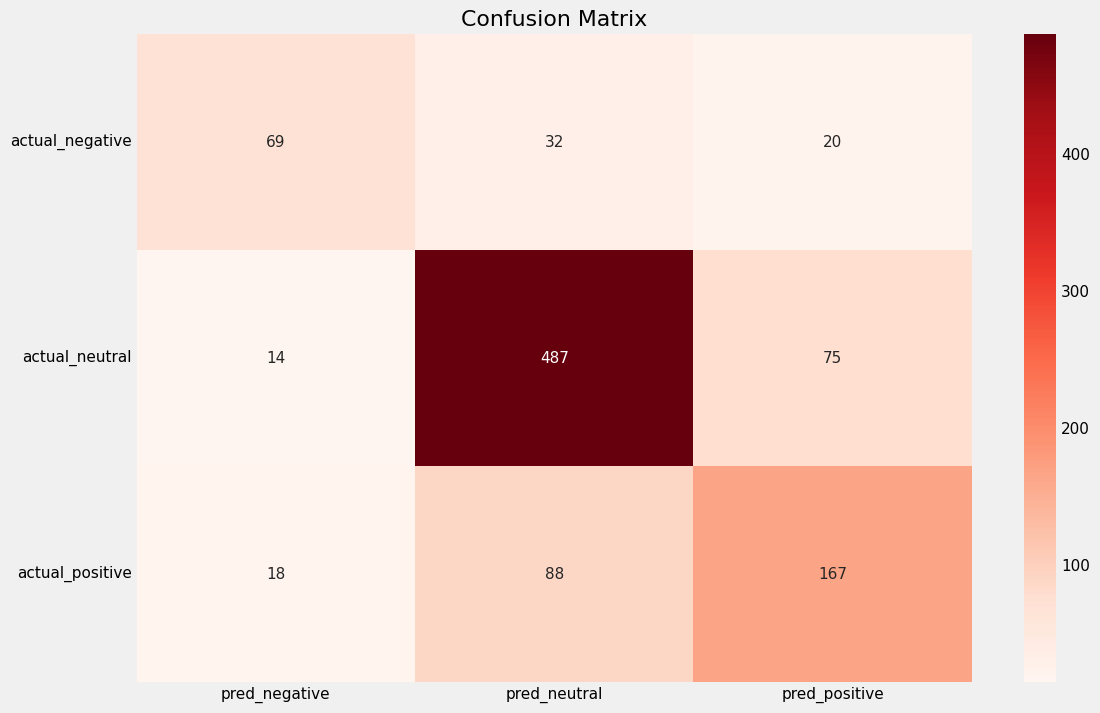

              precision    recall  f1-score   support

    negative       0.68      0.57      0.62       121
     neutral       0.80      0.85      0.82       576
    positive       0.64      0.61      0.62       273

    accuracy                           0.75       970
   macro avg       0.71      0.68      0.69       970
weighted avg       0.74      0.75      0.74       970

ROC AUC = 0.8592442232087021


In [ ]:
sentiment_reader(LogisticRegression(class_weight='balanced', max_iter=1000), 'LogisticRegression')

SGDClassifier model accuracy: 0.7783505154639175


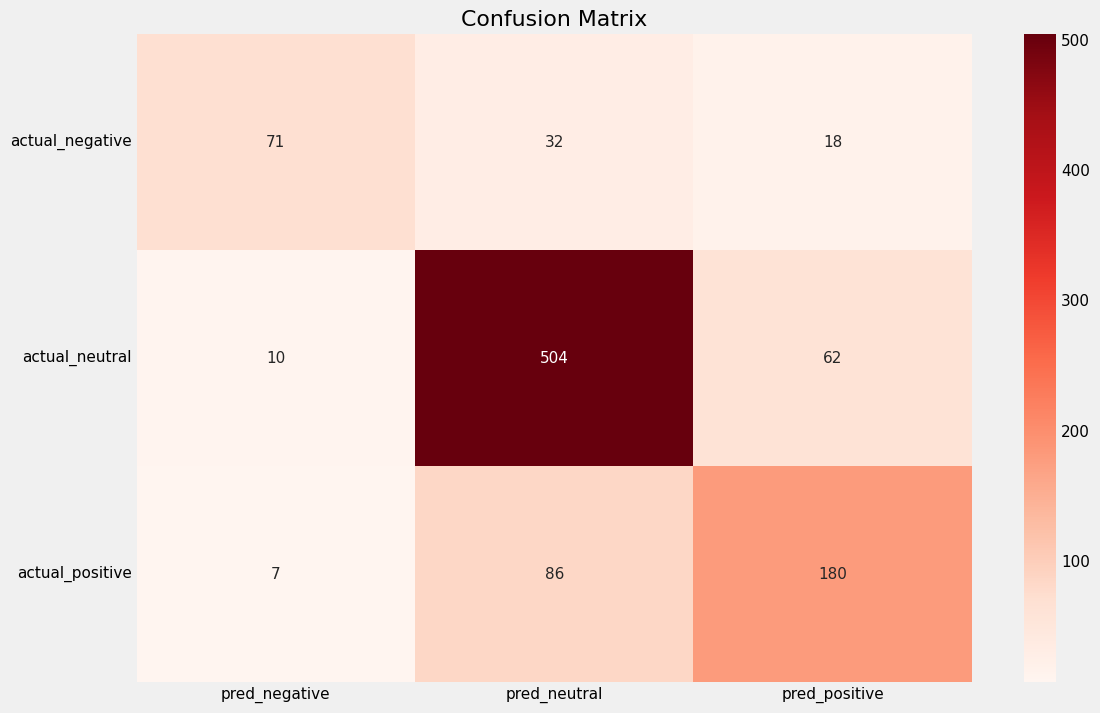

              precision    recall  f1-score   support

    negative       0.81      0.59      0.68       121
     neutral       0.81      0.88      0.84       576
    positive       0.69      0.66      0.68       273

    accuracy                           0.78       970
   macro avg       0.77      0.71      0.73       970
weighted avg       0.78      0.78      0.77       970

Probability estimations and ROC AUC are not available.


In [ ]:
# Create and evaluate SGDClassifier with linear SVM parameters and balanced class weights.
sentiment_reader(SGDClassifier(class_weight='balanced', loss='hinge', penalty='l2', tol=None), 'SGDClassifier')

In [ ]:
# Number of samples in the least represented class
quota = data['sentiment'].value_counts().min()
quota

604

In [ ]:
# New DataFrame to add equal number of samples from each class
balanced_data = pd.DataFrame(columns=['sentiment', 'text'])

In [ ]:
import pandas as pd

# Group the data by 'sentiment'
data_groups = data.groupby('sentiment')

# Create an empty DataFrame to store the balanced data
balanced_data = pd.DataFrame(columns=['sentiment', 'text'])

for group in data_groups.indices:
    reduced_class = data_groups.get_group(group)[['sentiment', 'text']].iloc[:quota, :]

    balanced_data = pd.concat([balanced_data, reduced_class], ignore_index=True)



<ipython-input-27-9e2326581dce>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_groups = data.groupby('sentiment')
<ipython-input-27-9e2326581dce>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, reduced_class], ignore_index=True)


In [ ]:
balanced_data['sentiment'].value_counts()

sentiment
negative    604
neutral     604
positive    604
Name: count, dtype: int64

In [ ]:
y = le.fit_transform(balanced_data['sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_data['text'],
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

SGDClassifier model accuracy: 0.8264462809917356


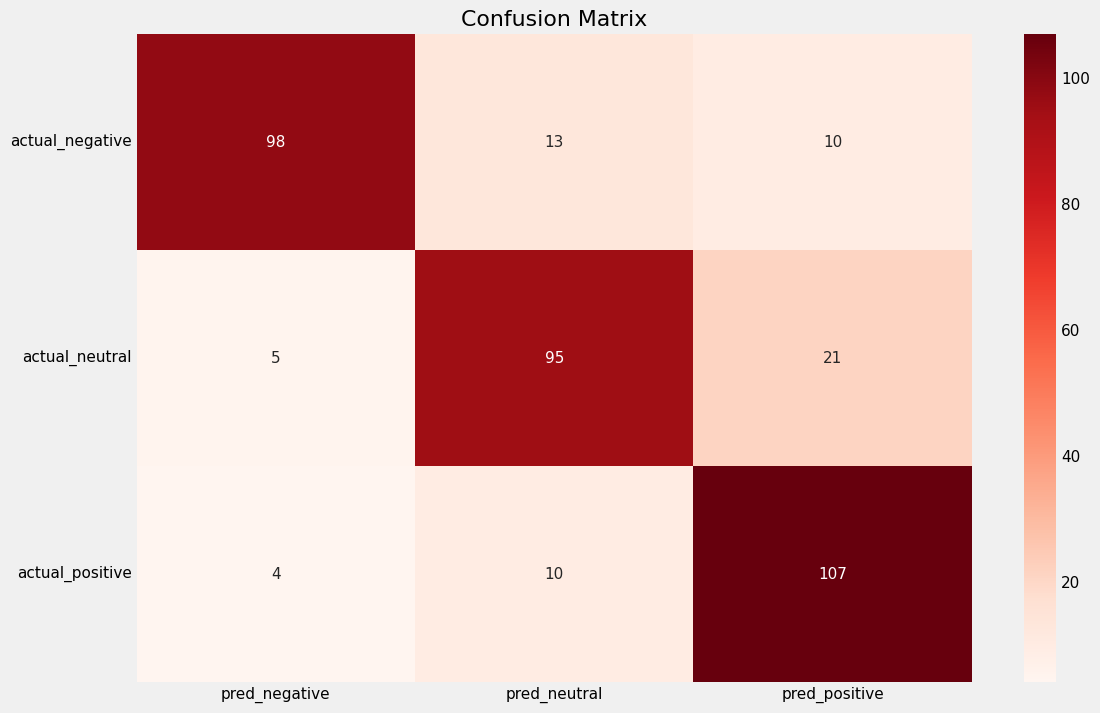

              precision    recall  f1-score   support

    negative       0.92      0.81      0.86       121
     neutral       0.81      0.79      0.79       121
    positive       0.78      0.88      0.83       121

    accuracy                           0.83       363
   macro avg       0.83      0.83      0.83       363
weighted avg       0.83      0.83      0.83       363

Probability estimations and ROC AUC are not available.


In [ ]:
sentiment_reader(SGDClassifier(loss='hinge', penalty='l2', tol=None), 'SGDClassifier')

In [ ]:
X = balanced_data['text']

pipe = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 3), max_df=0.8)),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2', tol=None))
    ])
pipe.fit(X, y)

Pipeline(steps=[('vect', CountVectorizer(max_df=0.8, ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(tol=None))])

In [ ]:
pipe.score(X, y)

0.9988962472406181

In [ ]:
unreduced_X = data['text']
unreduced_y = le.transform(data['sentiment'])
pipe.score(unreduced_X, unreduced_y)

0.7552620718118036

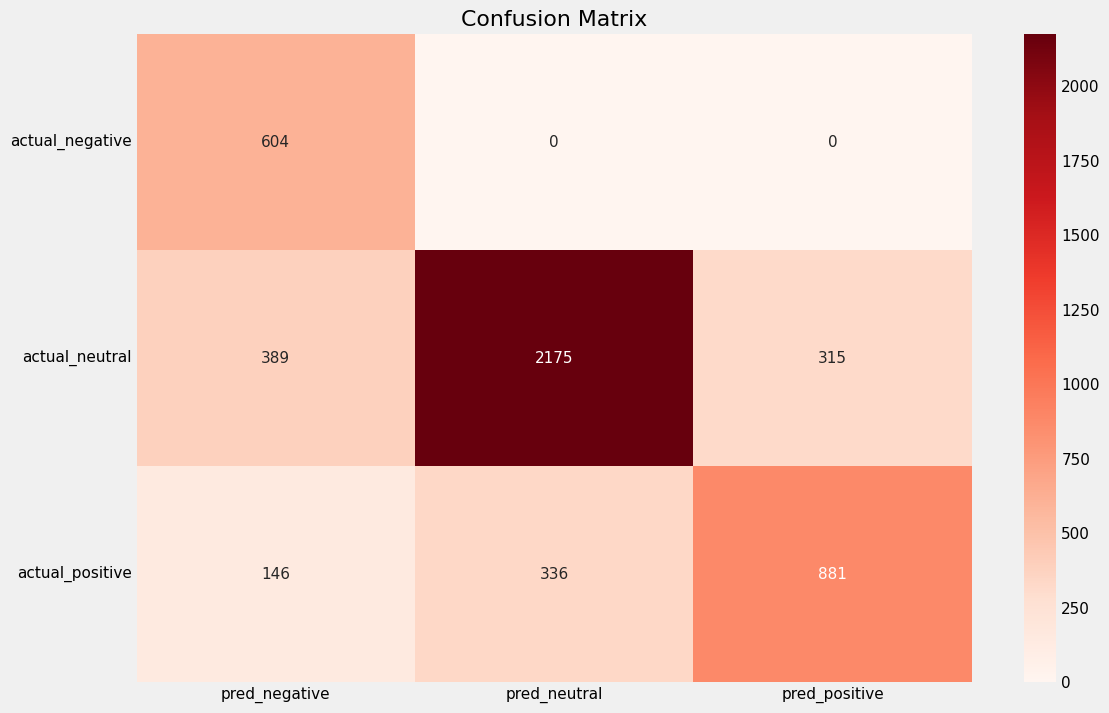

In [ ]:
# Confusion matrix
predicted_y = pipe.predict(unreduced_X)
conf_matrix = confusion_matrix(unreduced_y, predicted_y)

classes_names = le.classes_
columns = ['pred_' + name for name in classes_names]
indexes = ['actual_' + name for name in classes_names]
conf_matrix = pd.DataFrame(conf_matrix, columns=columns, index=indexes)

classification_heatmap(conf_matrix)

In [ ]:
# Try to get a prediction for out of sample headlines with obvious sentiment.
new_samples = ['Experts expect the world economy to grow at a steady rate of 3% a year.',
               'Local retailers reported much lower revenues this year. Expansion plans are suspended.']
prediction = pipe.predict(new_samples)
for pred in prediction:
    print(le.classes_[pred])

positive
negative


#C3

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
df=pd.read_csv('/content/stock_data.csv')
df.head()

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [ ]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
sentiment_count = Counter(df['Sentiment'])
print(sentiment_count)

Counter({1: 3685, -1: 2106})


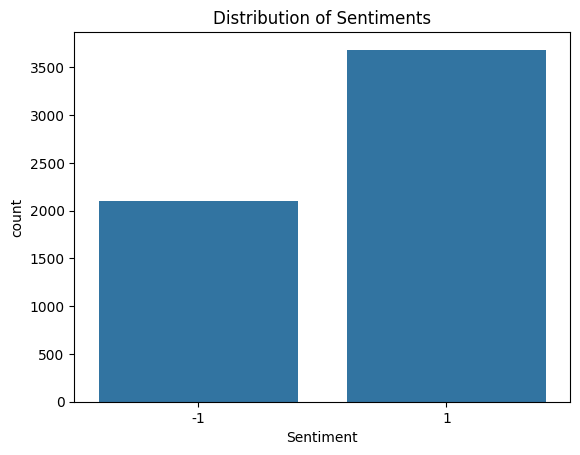

In [ ]:
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [ ]:
df['text_length'] = df['Text'].apply(len)

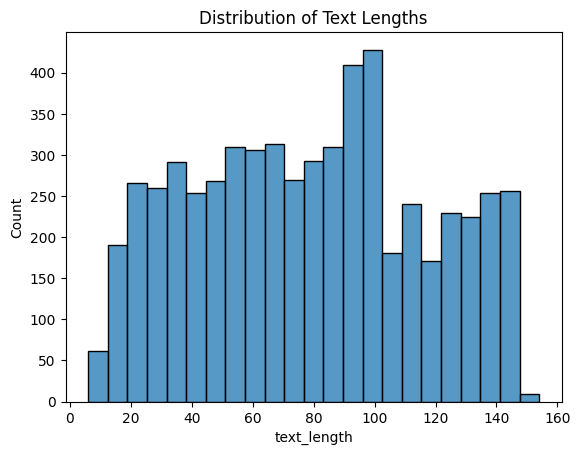

In [ ]:
sns.histplot(x='text_length', data=df)
plt.title('Distribution of Text Lengths')
plt.show()

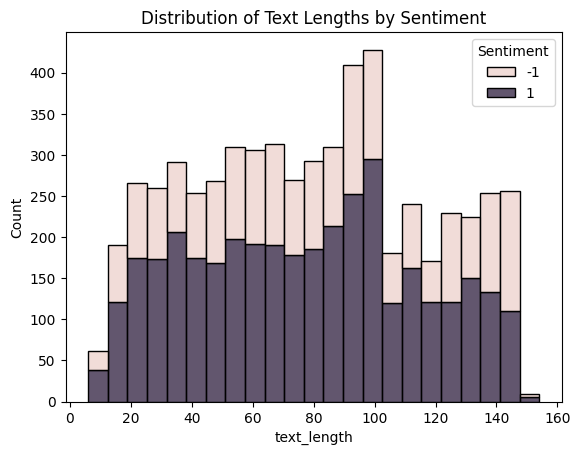

In [ ]:
sns.histplot(x='text_length', data=df, hue='Sentiment', multiple='stack')
plt.title('Distribution of Text Lengths by Sentiment')
plt.show()

In [ ]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\W', ' ', str(x))) # remove non-alphanumeric characters

In [ ]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x)) # remove single character words

In [ ]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\^[a-zA-Z]\s+', ' ', x)) # remove single characters at the beginning of text

In [ ]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I)) # replace multiple spaces with single space

In [ ]:
df['Text'] = df['Text'].apply(lambda x: x.lower()) # convert to lowercase

In [ ]:
#remove stop words and puncuations

nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words
df['text_processed'] = df['Text'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop and not token.is_punct]))

In [ ]:
df.head()

Text  Sentiment  text_length  \
0  kickers on my watchlist xide tit soq pnk cpw b...          1           95   
1  user aap movie 55 return for the fea geed indi...          1           95   
2  user d be afraid to short amzn they are lookin...          1          114   
3                                   mnta over 12 00           1           17   
4                                     oi over 21 37           1           16   

                                      text_processed  
0  kickers watchlist xide tit soq pnk cpw bpz aj ...  
1  user aap movie 55 return fea geed indicator 15...  
2  user d afraid short amzn looking like near mon...  
3                                         mnta 12 00  
4                                           oi 21 37

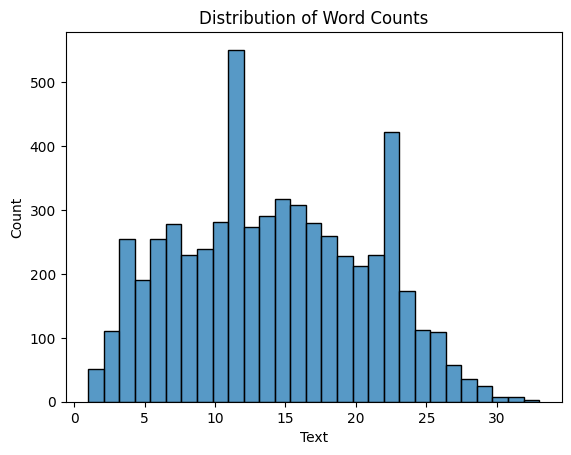

In [ ]:
word_count = df['Text'].apply(lambda x: len(x.split()))
sns.histplot(word_count)
plt.title('Distribution of Word Counts')
plt.show()

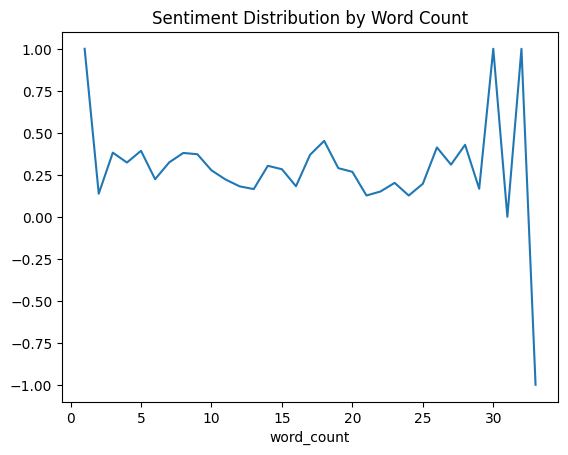

In [ ]:
df['word_count'] = word_count
df.groupby('word_count')['Sentiment'].mean().plot()
plt.title('Sentiment Distribution by Word Count')
plt.show()

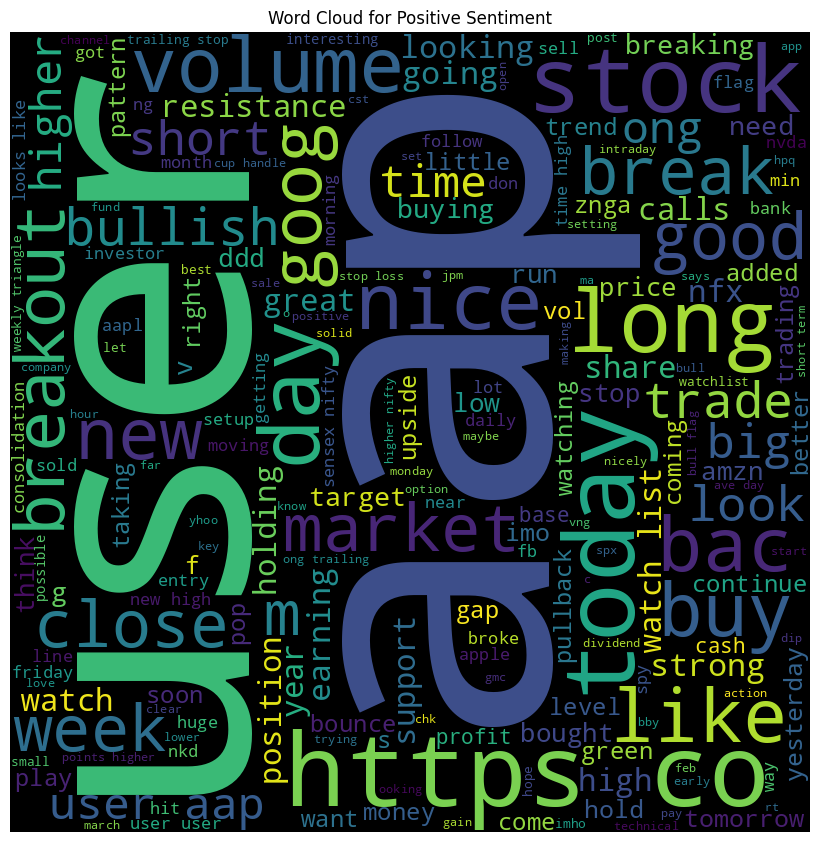

In [ ]:
positive_texts = df[df['Sentiment'] == 1]['text_processed']
positive_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=set()).generate(' '.join(positive_texts))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Positive Sentiment')
plt.show()

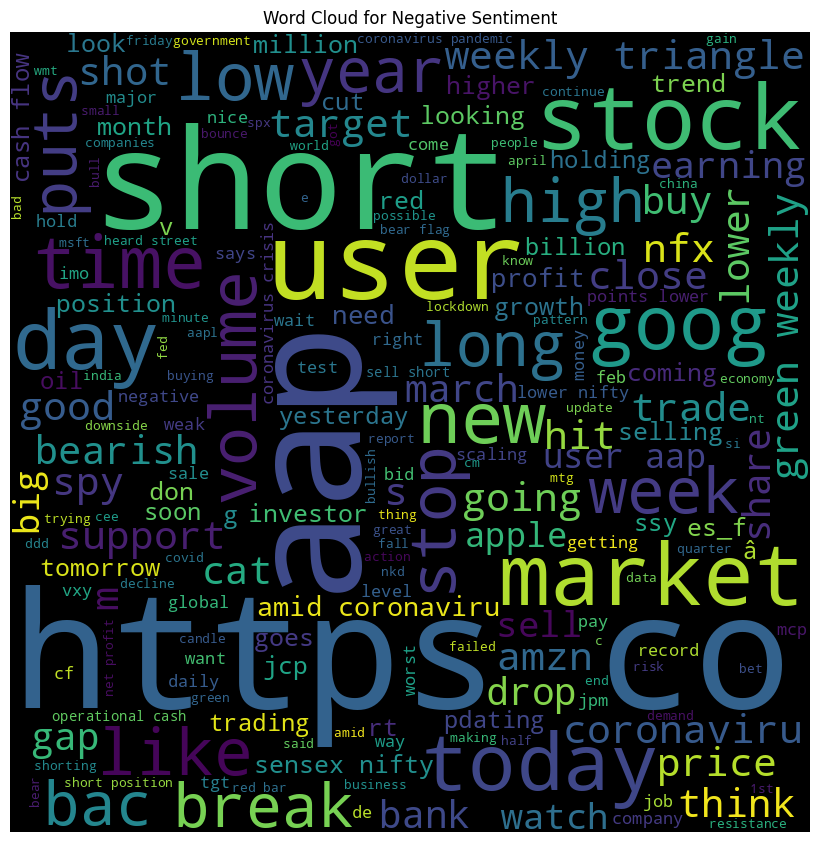

In [ ]:
negative_texts = df[df['Sentiment'] == -1]['text_processed']
negative_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=set()).generate(' '.join(negative_texts))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
ps = PorterStemmer()
df['Text'] = df['Text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))
df['text_processed'] = df['text_processed'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#randomization
df = df.sample(frac=1).reset_index(drop=True)
df.head()

Text  Sentiment  text_length  \
0  coronaviru global stock plung donald trump ann...         -1          112   
1  imm watch list gap bit line 20 day good volum ...          1           95   
2  aap set sell news tomorrow cook speech job mar...         -1          129   
3  aap littl pop tast hedg fund pile back bewa sh...          1          123   
4                 follow thru nkd 60c profit oh well          1           51   

                                      text_processed  word_count  
0  coronaviru global stock plung donald trump ann...          16  
1  imm watch list gap bit line 20 day good volum ...          20  
2  aap set sell news tomorrow cook speech job mar...          22  
3  aap littl pop tast hedg fund pile bewa short c...          24  
4                           follow nkd 60c profit oh          11

In [ ]:
from sklearn.utils import resample

# separate the two classes
df_class1 = df[df['Sentiment'] == 1]
df_class_1 = df[df['Sentiment'] == -1]

# downsample the majority class
df_class1_downsampled = resample(df_class1, replace=False, n_samples=len(df_class_1), random_state=42)

# combine the two classes
df_balanced = pd.concat([df_class1_downsampled, df_class_1])

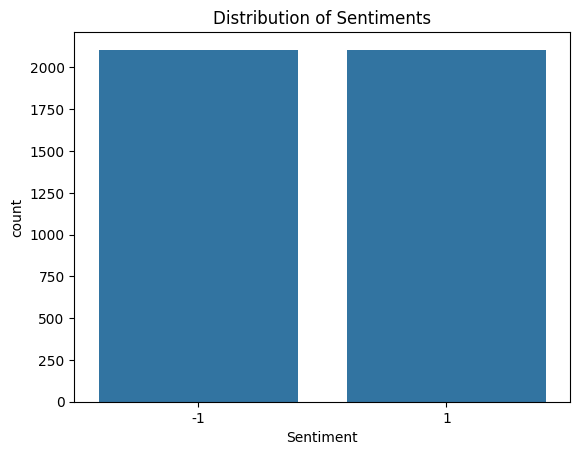

In [ ]:
sns.countplot(x='Sentiment', data=df_balanced)
plt.title('Distribution of Sentiments')
plt.show()

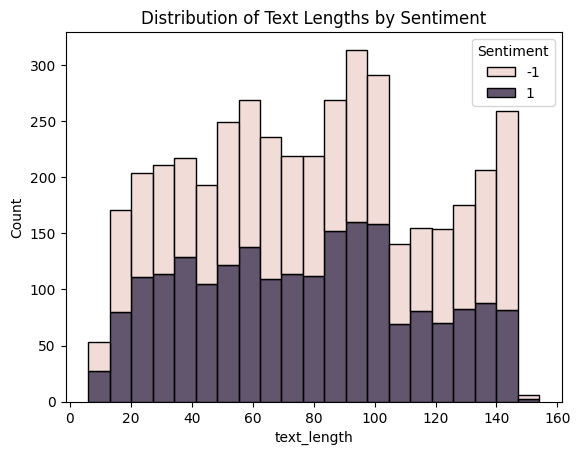

In [ ]:
sns.histplot(x='text_length', data=df_balanced, hue='Sentiment', multiple='stack')
plt.title('Distribution of Text Lengths by Sentiment')
plt.show()

In [ ]:
accuracy = {'TF-IDF': [],
            'BoW': []}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X = df['Text']
y = df['Sentiment']


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds.round())
accuracy['TF-IDF'].append(lr_acc)


lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, lgr_preds)
accuracy['TF-IDF'].append(lgr_acc)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
accuracy['TF-IDF'].append(dt_acc)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
accuracy['TF-IDF'].append(rf_acc)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
accuracy['TF-IDF'].append(knn_acc)

print(f"Linear Regression Accuracy: {lr_acc}")
print(f"Logistic Regression Accuracy: {lgr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")

Linear Regression Accuracy: 0.23123382226056946
Logistic Regression Accuracy: 0.7868852459016393
Decision Tree Accuracy: 0.7368421052631579
Random Forest Accuracy: 0.8067299396031061
KNN Accuracy: 0.7558239861949957


In [ ]:
model = ['LR','LogR','DT','RF','KNN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

model  accuracy
0    LR  0.231234
1  LogR  0.786885
2    DT  0.736842
3    RF  0.806730
4   KNN  0.755824

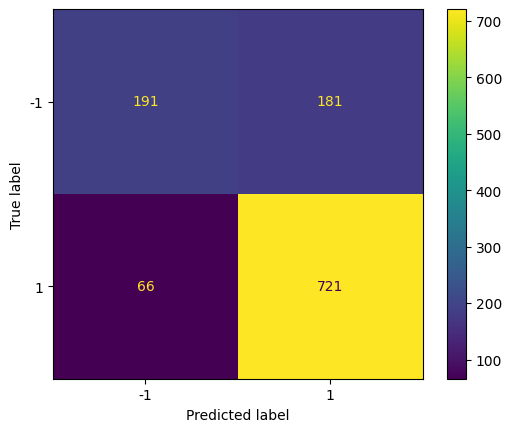

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Fit and predict with your models (same as before)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)

# Plot confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

X = df_balanced['Text']
y = df_balanced['Sentiment']


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds.round())



lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, lgr_preds)



dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)


print(f"Linear Regression Accuracy: {lr_acc}")
print(f"Logistic Regression Accuracy: {lgr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")

Linear Regression Accuracy: 0.060498220640569395
Logistic Regression Accuracy: 0.7817319098457889
Decision Tree Accuracy: 0.7141162514827996
Random Forest Accuracy: 0.7758007117437722
KNN Accuracy: 0.7295373665480427


In [ ]:
accuracy['TF-IDF']

[0.23123382226056946,
 0.7868852459016393,
 0.7368421052631579,
 0.8067299396031061,
 0.7558239861949957]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df['Text']
y = df['Sentiment']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds.round())
accuracy['BoW'].append(lr_acc)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, lgr_preds)
accuracy['BoW'].append(lgr_acc)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
accuracy['BoW'].append(dt_acc)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
accuracy['BoW'].append(rf_acc)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
accuracy['BoW'].append(knn_acc)

print(f"Linear Regression Accuracy: {lr_acc}")
print(f"Logistic Regression Accuracy: {lgr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")

Linear Regression Accuracy: 0.17687661777394306
Logistic Regression Accuracy: 0.7972389991371872
Decision Tree Accuracy: 0.7359792924935289
Random Forest Accuracy: 0.8041415012942191
KNN Accuracy: 0.6997411561691113


In [ ]:
model = ['LR','LogR','DT','RF','KNN']
data = {'model':model,'accuracy':accuracy['BoW']}
compare_models = pd.DataFrame(data)
compare_models

model  accuracy
0    LR  0.176877
1  LogR  0.797239
2    DT  0.735979
3    RF  0.804142
4   KNN  0.699741

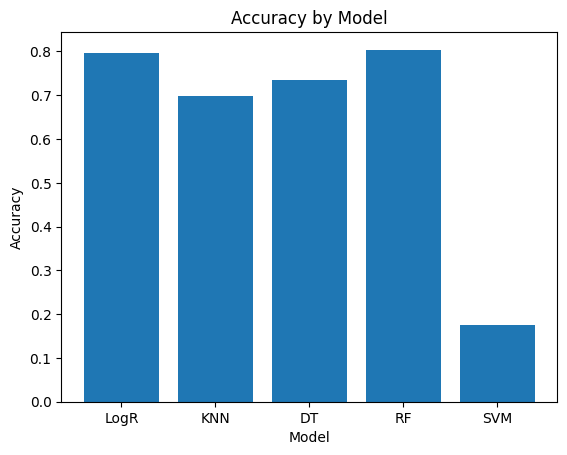

In [ ]:
# @title Accuracy by Model

import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['LogR', 'KNN', 'DT', 'RF', 'SVM']
accuracies = [0.797, 0.699, 0.735, 0.804, 0.176]

# Create bar chart
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
_ = plt.title('Accuracy by Model')

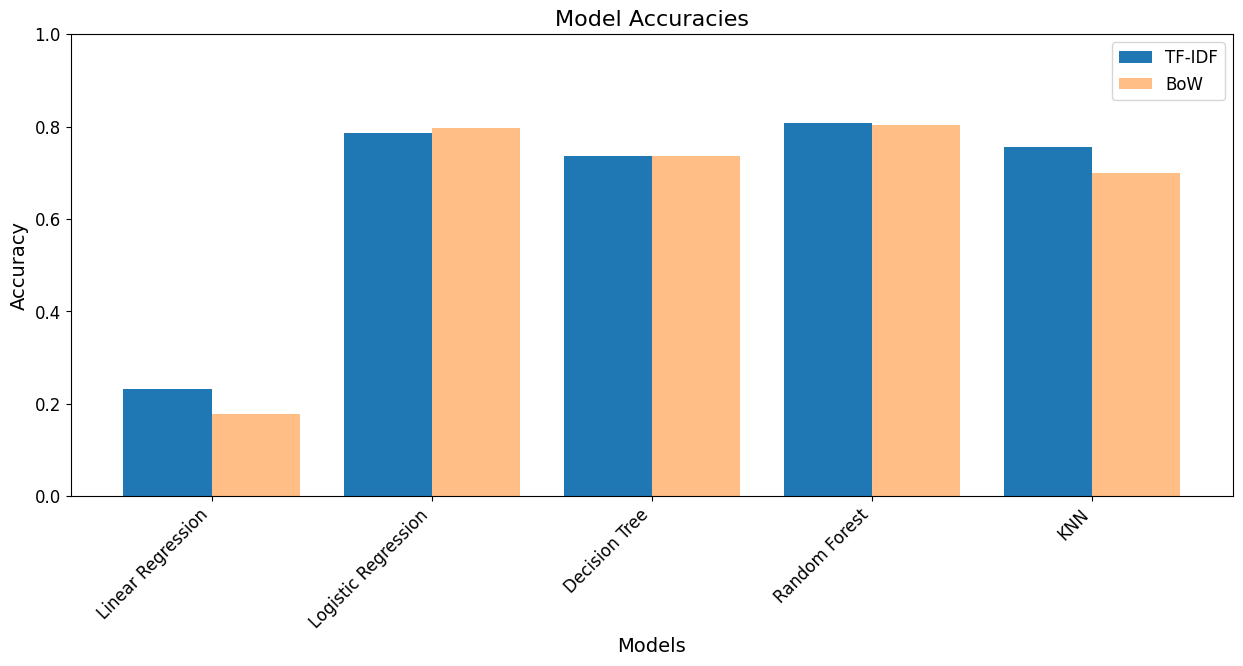

In [ ]:
models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

tfidf_acc = accuracy['TF-IDF']
bow_acc = accuracy['BoW']

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x - 0.2, tfidf_acc, width=0.4, label='TF-IDF')
ax.bar(x + 0.2, bow_acc, width=0.4, label='BoW', alpha=0.5)
ax.set_title('Model Accuracies', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0, 1)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(x, models, rotation=45, ha='right')
plt.show()

#C4

In [ ]:
# Import all the required libraries

import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#import machine learning libraries
import sklearn

In [ ]:
# Read csv file of cnbc headlines using pandas

cnbc = pd.read_csv('cnbc_headlines.csv')

In [ ]:
cnbc.head()

Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2                                                NaN   
3  Cramer's week ahead: Big week for earnings, ev...   
4  IQ Capital CEO Keith Bliss says tech and healt...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2                             NaN   
3   7:25  PM ET Fri, 17 July 2020   
4   4:24  PM ET Fri, 17 July 2020   

                                         Description  
0  "Mad Money" host Jim Cramer recommended buying...  
1  "Mad Money" host Jim Cramer rings the lightnin...  
2                                                NaN  
3  "We'll pay more for the earnings of the non-Co...  
4  Keith Bliss, IQ Capital CEO, joins "Closing Be...

In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [ ]:
# Checking all the columns in the cnbc headline dataset

cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values

cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc headline dataset

cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [ ]:
# drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [ ]:
cnbc.reset_index(inplace=True, drop=True)

In [ ]:
cnbc

Headlines  \
0     Jim Cramer: A better way to invest in the Covi...   
1        Cramer's lightning round: I would own Teradyne   
2     Cramer's week ahead: Big week for earnings, ev...   
3     IQ Capital CEO Keith Bliss says tech and healt...   
4     Wall Street delivered the 'kind of pullback I'...   
...                                                 ...   
2795                       Markets lack Christmas cheer   
2796  Cramer Remix: The biggest mistake you can make...   
2797  Cramer says owning too many stocks and too lit...   
2798  Cramer: I helped investors through the 2010 fl...   
2799  Cramer: Never buy a stock all at once — you'll...   

                                Time  \
0      7:51  PM ET Fri, 17 July 2020   
1      7:33  PM ET Fri, 17 July 2020   
2      7:25  PM ET Fri, 17 July 2020   
3      4:24  PM ET Fri, 17 July 2020   
4      7:36  PM ET Thu, 16 July 2020   
...                              ...   
2795   10:15  AM ET Tue, 26 Dec 2017   
2796  11:12  AM ET Thu, 20 Sept 2018   
2797    7:07  PM ET Fri, 22 Dec 2017   
2798    7:07  PM ET Fri, 22 Dec 2017   
2799    6:52  PM ET Fri, 22 Dec 2017   

                                            Description  
0     "Mad Money" host Jim Cramer recommended buying...  
1     "Mad Money" host Jim Cramer rings the lightnin...  
2     "We'll pay more for the earnings of the non-Co...  
3     Keith Bliss, IQ Capital CEO, joins "Closing Be...  
4     "Look for the stocks of high-quality companies...  
...                                                 ...  
2795  According to Kensho, here's how markets have f...  
2796  Jim Cramer revealed his top rule when it comes...  
2797  Jim Cramer broke down why owning fewer stocks ...  
2798  Jim Cramer built on his "nobody ever made a di...  
2799  Jim Cramer doubled down on his key investing r...  

[2800 rows x 3 columns]

In [ ]:
cnbc.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
# checking whether duplicate records are present

dup_list = list(cnbc.duplicated(keep='first').values)
dup_list.count(True)

0

In [ ]:
# drop the duplicate rows in the dataset keep the first one
cnbc.drop_duplicates(keep='first', inplace=True)

In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

Basic EDA on Guardian headlines dataset

In [ ]:
# Read csv file of guardian headlines using pandas

guard_data = pd.read_csv('/content/guardian_headlines.csv')

In [ ]:
guard_data.head()

Time                                          Headlines
0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...

In [ ]:
#check the shape of gaurdian headline dataset
guard_data.shape

(17800, 2)

In [ ]:
#check columns of gaurdian headline
guard_data.columns

Index(['Time', 'Headlines'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
guard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
# check null values in gaurdian headlines dataset
guard_data.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [ ]:
# drop duplicate rows in headlines and keep the first one
guard_data.drop_duplicates(keep='first', inplace=True)
guard_data

Time                                          Headlines
0      18-Jul-20   Johnson is asking Santa for a Christmas recovery
1      18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2      18-Jul-20  Five key areas Sunak must tackle to serve up e...
3      18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...          ...                                                ...
17795  17-Dec-17  How investing in solar energy can create a bri...
17796  17-Dec-17     Poundland suppliers hit by insurance downgrade
17797  17-Dec-17  Cryptocurrencies: City watchdog to investigate...
17798  17-Dec-17  Unilever sells household name spreads to KKR f...
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 2 columns]

Basic EDA on reuters headlines

In [ ]:
# Read csv file of reuters headlines using using pandas

reuters = pd.read_csv('/content/reuters_headlines.csv')

In [ ]:
reuters.head()

Headlines         Time  \
0  TikTok considers London and other locations fo...  Jul 18 2020   
1  Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2  Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3  Twitter says attackers downloaded data from up...  Jul 18 2020   
4  U.S. Republicans seek liability protections as...  Jul 17 2020   

                                         Description  
0  TikTok has been in discussions with the UK gov...  
1  Walt Disney  has become the latest company to ...  
2  Former Wirecard  chief operating officer Jan M...  
3  Twitter Inc said on Saturday that hackers were...  
4  A battle in the U.S. Congress over a new coron...

In [ ]:
#check the shape of reuters headlines dataset
reuters.shape

(32770, 3)

In [ ]:
#check the columns of reuters headline dataset
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
# Check for missing values in all the columnns of reuters headlines dataset

reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
#drop the duplicate rows in reuters headlines dataset and keep the first one

reuters.drop_duplicates(keep='first', inplace=True)
reuters

Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  
0      TikTok has been in discussions with the UK gov...  
1      Walt Disney  has become the latest company to ...  
2      Former Wirecard  chief operating officer Jan M...  
3      Twitter Inc said on Saturday that hackers were...  
4      A battle in the U.S. Congress over a new coron...  
...                                                  ...  
32765  The Malaysian government and the ruling party ...  
32766  German prosecutors said on Tuesday they had se...  
32767  McDonald's Corp on Tuesday announced an approv...  
32768  Pratt & Whitney will soon begin deliveries of ...  
32769  Britain will consider any suggestions to give ...  

[32715 rows x 3 columns]

In [ ]:
reuters.reset_index(drop=True, inplace=True)

Supporting functions for further data processing and Modelling

Preprocessing

In [ ]:
# creating a function for preprocessing

def preprocessing_text(data):

    # Check if the data is a string; if not, return it as is (or return an empty string if preferred)
    if isinstance(data, str):
        data = data.lower()
        # Additional preprocessing steps go here
    return data

    #convert all to lowercase
    data = data.lower()


    #removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #remove stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]


    #stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    #lemmitizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)

In [ ]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    # Ensure all entries in the column are strings; replace non-strings with empty strings
    df[colm_name] = df[colm_name].apply(lambda x: str(x) if isinstance(x, str) else "")

    # Assigning polarity scores for the column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))

    # Picking only the compound score (combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])

    # Mapping the compound score to positive, negative, or neutral using a custom mapper function
    df['ds_score'] = df['compound_score'].apply(mapper)

    # Drop the intermediate polarity_scores and compound_score columns
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)

    return df

Now working with description on datasets

In [ ]:
# concatenate cnbc headlines dataset and reuters headline dataset

cnbc_reuters = pd.concat([cnbc, reuters], axis=0)

In [ ]:
#check the shape of this new dataset

cnbc_reuters.shape

(35515, 3)

In [ ]:
#make a copy of new dataset

cnbc_reu = cnbc_reuters.copy()

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

# apply preprocessing to the description of new dataset

cnbc_reu['Description'] = cnbc_reu['Description'].apply(preprocessing_text)
cnbc_reu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Headlines  \
0      Jim Cramer: A better way to invest in the Covi...   
1         Cramer's lightning round: I would own Teradyne   
2      Cramer's week ahead: Big week for earnings, ev...   
3      IQ Capital CEO Keith Bliss says tech and healt...   
4      Wall Street delivered the 'kind of pullback I'...   
...                                                  ...   
32710  Malaysia says never hired British data firm at...   
32711  Prosecutors search Volkswagen headquarters in ...   
32712   McDonald's sets greenhouse gas reduction targets   
32713  Pratt & Whitney to deliver spare A320neo engin...   
32714  UK will always consider ways to improve data l...   

                                 Time  \
0       7:51  PM ET Fri, 17 July 2020   
1       7:33  PM ET Fri, 17 July 2020   
2       7:25  PM ET Fri, 17 July 2020   
3       4:24  PM ET Fri, 17 July 2020   
4       7:36  PM ET Thu, 16 July 2020   
...                               ...   
32710                     Mar 20 2018   
32711                     Mar 20 2018   
32712                     Mar 20 2018   
32713                     Mar 20 2018   
32714                     Mar 20 2018   

                                             Description  
0      "mad money" host jim cramer recommended buying...  
1      "mad money" host jim cramer rings the lightnin...  
2      "we'll pay more for the earnings of the non-co...  
3      keith bliss, iq capital ceo, joins "closing be...  
4      "look for the stocks of high-quality companies...  
...                                                  ...  
32710  the malaysian government and the ruling party ...  
32711  german prosecutors said on tuesday they had se...  
32712  mcdonald's corp on tuesday announced an approv...  
32713  pratt & whitney will soon begin deliveries of ...  
32714  britain will consider any suggestions to give ...  

[35515 rows x 3 columns]

In [ ]:
# apply the function  which decides sentiment to  polarity score column

df = sentiment_analysis(cnbc_reu, 'Description')
df

Headlines  \
0      Jim Cramer: A better way to invest in the Covi...   
1         Cramer's lightning round: I would own Teradyne   
2      Cramer's week ahead: Big week for earnings, ev...   
3      IQ Capital CEO Keith Bliss says tech and healt...   
4      Wall Street delivered the 'kind of pullback I'...   
...                                                  ...   
32710  Malaysia says never hired British data firm at...   
32711  Prosecutors search Volkswagen headquarters in ...   
32712   McDonald's sets greenhouse gas reduction targets   
32713  Pratt & Whitney to deliver spare A320neo engin...   
32714  UK will always consider ways to improve data l...   

                                 Time  \
0       7:51  PM ET Fri, 17 July 2020   
1       7:33  PM ET Fri, 17 July 2020   
2       7:25  PM ET Fri, 17 July 2020   
3       4:24  PM ET Fri, 17 July 2020   
4       7:36  PM ET Thu, 16 July 2020   
...                               ...   
32710                     Mar 20 2018   
32711                     Mar 20 2018   
32712                     Mar 20 2018   
32713                     Mar 20 2018   
32714                     Mar 20 2018   

                                             Description  ds_score  
0      "mad money" host jim cramer recommended buying...  Positive  
1      "mad money" host jim cramer rings the lightnin...  Negative  
2      "we'll pay more for the earnings of the non-co...  Positive  
3      keith bliss, iq capital ceo, joins "closing be...  Positive  
4      "look for the stocks of high-quality companies...  Negative  
...                                                  ...       ...  
32710  the malaysian government and the ruling party ...  Negative  
32711  german prosecutors said on tuesday they had se...  Positive  
32712  mcdonald's corp on tuesday announced an approv...  Negative  
32713  pratt & whitney will soon begin deliveries of ...  Negative  
32714  britain will consider any suggestions to give ...  Positive  

[35515 rows x 4 columns]

In above we added the target column which has 3 classes (Positive, Negative, Neutral) to the dataset

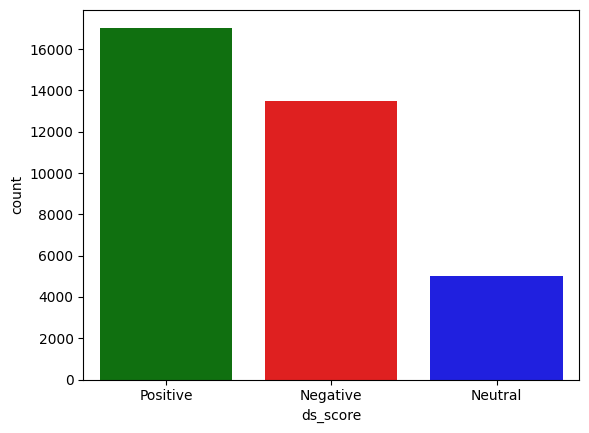

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette that matches the case of the 'ds_score' values
palette = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

# Plot a count plot with different colors for each 'ds_score' category
sns.countplot(x='ds_score', data=df, hue='ds_score', palette=palette, legend=False)

# Display the plot
plt.show()


In [ ]:
df['ds_score'].value_counts()

ds_score
Positive    17040
Negative    13482
Neutral      4993
Name: count, dtype: int64

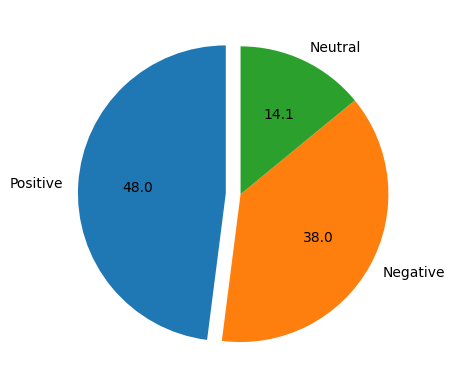

In [ ]:
# pie chart on description score column

plt.pie([17040, 13482, 4993], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

Modelling on description based dataset

In [ ]:
# split the dataset  into test and train

from sklearn.model_selection import train_test_split

X = df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.8260135135135135
Confusion matrix:  [[1163   53  165]
 [  82  280  121]
 [ 144   53 1491]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1381
     Neutral       0.73      0.58      0.64       483
    Positive       0.84      0.88      0.86      1688

    accuracy                           0.83      3552
   macro avg       0.80      0.77      0.78      3552
weighted avg       0.82      0.83      0.82      3552

CPU times: user 9.94 s, sys: 122 ms, total: 10.1 s
Wall time: 8.44 s


LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.7961711711711712
Confusion matrix:  [[1127   32  222]
 [  91  209  183]
 [ 167   29 1492]]
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81      1381
     Neutral       0.77      0.43      0.56       483
    Positive       0.79      0.88      0.83      1688

    accuracy                           0.80      3552
   macro avg       0.79      0.71      0.73      3552
weighted avg       0.80      0.80      0.79      3552

CPU times: user 11.9 s, sys: 2.25 s, total: 14.2 s
Wall time: 17.8 s


MULTINOMIAL NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.6587837837837838
Confusion matrix:  [[ 803    2  576]
 [  62   12  409]
 [ 162    1 1525]]
              precision    recall  f1-score   support

    Negative       0.78      0.58      0.67      1381
     Neutral       0.80      0.02      0.05       483
    Positive       0.61      0.90      0.73      1688

    accuracy                           0.66      3552
   macro avg       0.73      0.50      0.48      3552
weighted avg       0.70      0.66      0.61      3552

CPU times: user 2.23 s, sys: 4.74 ms, total: 2.23 s
Wall time: 2.35 s


BERNOULLI NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

from sklearn.naive_bayes import BernoulliNB


# Fit the pipeline to the data
bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_ds.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7066441441441441
Confusion matrix:  [[1005   58  318]
 [  92  184  207]
 [ 295   72 1321]]
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.72      1381
     Neutral       0.59      0.38      0.46       483
    Positive       0.72      0.78      0.75      1688

    accuracy                           0.71      3552
   macro avg       0.67      0.63      0.64      3552
weighted avg       0.70      0.71      0.70      3552

CPU times: user 2.43 s, sys: 15.6 ms, total: 2.45 s
Wall time: 2.67 s


GRADIENT BOOSTING CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier


# Fit the pipeline to the data
grad_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_ds.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_ds.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.6568130630630631
Confusion matrix:  [[ 755   12  614]
 [  17   45  421]
 [ 140   15 1533]]
              precision    recall  f1-score   support

    Negative       0.83      0.55      0.66      1381
     Neutral       0.62      0.09      0.16       483
    Positive       0.60      0.91      0.72      1688

    accuracy                           0.66      3552
   macro avg       0.68      0.52      0.51      3552
weighted avg       0.69      0.66      0.62      3552

CPU times: user 2min 43s, sys: 143 ms, total: 2min 43s
Wall time: 2min 51s


XGBOOST CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.7789977477477478
Confusion matrix:  [[1019   56  306]
 [  28  258  197]
 [ 149   49 1490]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1381
           1       0.71      0.53      0.61       483
           2       0.75      0.88      0.81      1688

    accuracy                           0.78      3552
   macro avg       0.77      0.72      0.74      3552
weighted avg       0.78      0.78      0.78      3552

CPU times: user 3min 23s, sys: 1.07 s, total: 3min 24s
Wall time: 2min 9s


Metrics comparison for above models (performance measurement)

In [ ]:
# helper function for comparing models matric

def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):

    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names

    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]

    return metrics_df

In [ ]:
# list of model objects
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, bern_nb_ds, grad_boost_ds, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_df

model_names  accuracy  precision    recall  f1_score
0      LinearSVC  0.826014   0.822913  0.826014  0.823085
1  LogRegression  0.796171   0.795395  0.796171  0.787868
2  MultinomialNB  0.658784   0.701511  0.658784  0.611126
3    BernoulliNB  0.706644   0.700457  0.706644  0.699879
4  GradientBoost  0.656813   0.690543  0.656813  0.620432
5        XGBoost  0.778998   0.783189  0.778998  0.775138

From above metrics comparison, we could confirm that Linear SVC model performs better than all other models

working with test dataset

In [ ]:
# Perforn the prediction on the test dataset
pred = lin_svc_ds.predict(X_test)
pred

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
# creating a dataframe of predicted results
pred = pd.DataFrame(pred, columns=['predictions'])

In [ ]:
pred

predictions
0       Negative
1       Negative
2       Positive
3       Positive
4       Positive
...          ...
3547    Negative
3548    Positive
3549     Neutral
3550    Positive
3551     Neutral

[3552 rows x 1 columns]

Now working with headlines + description

In [ ]:
# merge headlines and description of new dataset and name it info

cnbc_reu['info'] = cnbc_reu['Headlines'] + ' ' + cnbc_reu['Description']
cnbc_reu.head()

Headlines  \
0  Jim Cramer: A better way to invest in the Covi...   
1     Cramer's lightning round: I would own Teradyne   
2  Cramer's week ahead: Big week for earnings, ev...   
3  IQ Capital CEO Keith Bliss says tech and healt...   
4  Wall Street delivered the 'kind of pullback I'...   

                             Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2   7:25  PM ET Fri, 17 July 2020   
3   4:24  PM ET Fri, 17 July 2020   
4   7:36  PM ET Thu, 16 July 2020   

                                         Description  ds_score  \
0  "mad money" host jim cramer recommended buying...  Positive   
1  "mad money" host jim cramer rings the lightnin...  Negative   
2  "we'll pay more for the earnings of the non-co...  Positive   
3  keith bliss, iq capital ceo, joins "closing be...  Positive   
4  "look for the stocks of high-quality companies...  Negative   

                                                info  
0  Jim Cramer: A better way to invest in the Covi...  
1  Cramer's lightning round: I would own Teradyne...  
2  Cramer's week ahead: Big week for earnings, ev...  
3  IQ Capital CEO Keith Bliss says tech and healt...  
4  Wall Street delivered the 'kind of pullback I'...

In [ ]:
# keeping info and time column, drop all remaining columns

cnbc_new = cnbc_reu.drop(['Headlines', 'Description', 'ds_score'], axis=1)
cnbc_new.head()

Time  \
0   7:51  PM ET Fri, 17 July 2020   
1   7:33  PM ET Fri, 17 July 2020   
2   7:25  PM ET Fri, 17 July 2020   
3   4:24  PM ET Fri, 17 July 2020   
4   7:36  PM ET Thu, 16 July 2020   

                                                info  
0  Jim Cramer: A better way to invest in the Covi...  
1  Cramer's lightning round: I would own Teradyne...  
2  Cramer's week ahead: Big week for earnings, ev...  
3  IQ Capital CEO Keith Bliss says tech and healt...  
4  Wall Street delivered the 'kind of pullback I'...

In [ ]:
# apply preprocessing on info column

cnbc_new['info'] = cnbc_new['info'].apply(preprocessing_text)
cnbc_new

Time  \
0       7:51  PM ET Fri, 17 July 2020   
1       7:33  PM ET Fri, 17 July 2020   
2       7:25  PM ET Fri, 17 July 2020   
3       4:24  PM ET Fri, 17 July 2020   
4       7:36  PM ET Thu, 16 July 2020   
...                               ...   
32710                     Mar 20 2018   
32711                     Mar 20 2018   
32712                     Mar 20 2018   
32713                     Mar 20 2018   
32714                     Mar 20 2018   

                                                    info  
0      jim cramer: a better way to invest in the covi...  
1      cramer's lightning round: i would own teradyne...  
2      cramer's week ahead: big week for earnings, ev...  
3      iq capital ceo keith bliss says tech and healt...  
4      wall street delivered the 'kind of pullback i'...  
...                                                  ...  
32710  malaysia says never hired british data firm at...  
32711  prosecutors search volkswagen headquarters in ...  
32712  mcdonald's sets greenhouse gas reduction targe...  
32713  pratt & whitney to deliver spare a320neo engin...  
32714  uk will always consider ways to improve data l...  

[35515 rows x 2 columns]

In [ ]:
# apply the function  which decides sentiment to  polarity score column

cnbc_new = sentiment_analysis(cnbc_new, 'info')
cnbc_new

Time  \
0       7:51  PM ET Fri, 17 July 2020   
1       7:33  PM ET Fri, 17 July 2020   
2       7:25  PM ET Fri, 17 July 2020   
3       4:24  PM ET Fri, 17 July 2020   
4       7:36  PM ET Thu, 16 July 2020   
...                               ...   
32710                     Mar 20 2018   
32711                     Mar 20 2018   
32712                     Mar 20 2018   
32713                     Mar 20 2018   
32714                     Mar 20 2018   

                                                    info  ds_score  
0      jim cramer: a better way to invest in the covi...  Positive  
1      cramer's lightning round: i would own teradyne...  Negative  
2      cramer's week ahead: big week for earnings, ev...  Positive  
3      iq capital ceo keith bliss says tech and healt...  Positive  
4      wall street delivered the 'kind of pullback i'...  Negative  
...                                                  ...       ...  
32710  malaysia says never hired british data firm at...  Negative  
32711  prosecutors search volkswagen headquarters in ...  Positive  
32712  mcdonald's sets greenhouse gas reduction targe...  Negative  
32713  pratt & whitney to deliver spare a320neo engin...  Negative  
32714  uk will always consider ways to improve data l...  Positive  

[35515 rows x 3 columns]

<ipython-input-119-b00dd32a55d3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ds_score', data=cnbc_new, palette=palette);


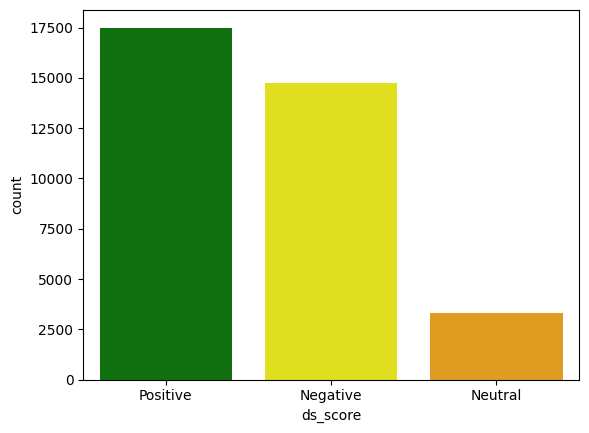

In [ ]:
# perform count plot on info_score column
palette = {
    'Positive': 'green',
    'Negative': 'yellow',
    'Neutral': 'orange'
}
sns.countplot(x='ds_score', data=cnbc_new, palette=palette);

In [ ]:
df['ds_score'].value_counts()

ds_score
Positive    17040
Negative    13482
Neutral      4993
Name: count, dtype: int64

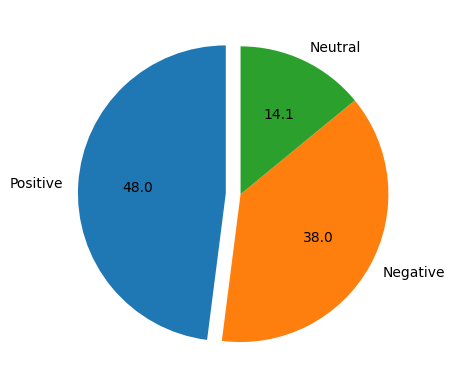

In [ ]:
# perform pie chart on info_score column

plt.pie([17040, 13482, 4993], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

modeling on headlines + description

In [ ]:
# split the dataset  into test and train


X = cnbc_new['info']
y = cnbc_new.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data
lin_svc_info = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_info.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_info.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.831081081081081
Confusion matrix:  [[1278   21  186]
 [  77  125  119]
 [ 173   24 1549]]
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      1485
     Neutral       0.74      0.39      0.51       321
    Positive       0.84      0.89      0.86      1746

    accuracy                           0.83      3552
   macro avg       0.80      0.71      0.74      3552
weighted avg       0.83      0.83      0.82      3552

CPU times: user 8.78 s, sys: 45.5 ms, total: 8.83 s
Wall time: 5.96 s


LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


# Fit the pipeline to the data
log_reg_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_info.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_info.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LOGISTIC REGRESSION
accuarcy score:  0.8037725225225225
Confusion matrix:  [[1241    9  235]
 [  90   69  162]
 [ 186   15 1545]]
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      1485
     Neutral       0.74      0.21      0.33       321
    Positive       0.80      0.88      0.84      1746

    accuracy                           0.80      3552
   macro avg       0.79      0.65      0.67      3552
weighted avg       0.80      0.80      0.79      3552

CPU times: user 14.4 s, sys: 3.89 s, total: 18.3 s
Wall time: 12.6 s


MULTINOMIAL NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
multi_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_info.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.7136824324324325
Confusion matrix:  [[ 996    0  489]
 [  62    1  258]
 [ 208    0 1538]]
              precision    recall  f1-score   support

    Negative       0.79      0.67      0.72      1485
     Neutral       1.00      0.00      0.01       321
    Positive       0.67      0.88      0.76      1746

    accuracy                           0.71      3552
   macro avg       0.82      0.52      0.50      3552
weighted avg       0.75      0.71      0.68      3552

CPU times: user 2.89 s, sys: 27 ms, total: 2.92 s
Wall time: 3.75 s


BERNOULLI NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
bern_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_info.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7255067567567568
Confusion matrix:  [[1126   21  338]
 [  83   63  175]
 [ 328   30 1388]]
              precision    recall  f1-score   support

    Negative       0.73      0.76      0.75      1485
     Neutral       0.55      0.20      0.29       321
    Positive       0.73      0.79      0.76      1746

    accuracy                           0.73      3552
   macro avg       0.67      0.58      0.60      3552
weighted avg       0.72      0.73      0.71      3552

CPU times: user 2.97 s, sys: 24.1 ms, total: 2.99 s
Wall time: 3.89 s


GRADIENT BOOSTING CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data
grad_boost_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_info.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_info.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.6880630630630631
Confusion matrix:  [[ 887    1  597]
 [  17    7  297]
 [ 190    6 1550]]
              precision    recall  f1-score   support

    Negative       0.81      0.60      0.69      1485
     Neutral       0.50      0.02      0.04       321
    Positive       0.63      0.89      0.74      1746

    accuracy                           0.69      3552
   macro avg       0.65      0.50      0.49      3552
weighted avg       0.70      0.69      0.66      3552

CPU times: user 3min 10s, sys: 183 ms, total: 3min 11s
Wall time: 3min 19s


XGBOOST CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.7713963963963963
Confusion matrix:  [[1139   13  333]
 [  38   60  223]
 [ 193   12 1541]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1485
           1       0.71      0.19      0.30       321
           2       0.73      0.88      0.80      1746

    accuracy                           0.77      3552
   macro avg       0.76      0.61      0.63      3552
weighted avg       0.77      0.77      0.75      3552

CPU times: user 3min 56s, sys: 935 ms, total: 3min 57s
Wall time: 2min 29s


In [ ]:
# Metrics comparison as we done before

model_objects = [lin_svc_info, log_reg_info, multi_nb_info, bern_nb_info, grad_boost_info, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_info_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_info_df

model_names  accuracy  precision    recall  f1_score
0      LinearSVC  0.831081   0.826811  0.831081  0.823686
1  LogRegression  0.803773   0.800127  0.803773  0.787630
2  MultinomialNB  0.713682   0.750141  0.713682  0.678387
3    BernoulliNB  0.725507   0.715126  0.725507  0.711884
4  GradientBoost  0.688063   0.695901  0.688063  0.655034
5        XGBoost  0.771396   0.772596  0.771396  0.754507

Observations

Compared to description, model trained on both headlines and description has metrics/perfromance little lower than former one in case of Linear SVC model
XG boost model performs well on both training set

working with test data

In [ ]:
# Perforn the prediction on the test dataset

prediction = lin_svc_info.predict(X_test)
prediction

array(['Positive', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
# creating a dataframe of predicted results

preds = pd.DataFrame(prediction, columns=['predictions'])

In [ ]:
preds

predictions
0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
...          ...
3547    Negative
3548    Positive
3549     Neutral
3550    Positive
3551    Negative

[3552 rows x 1 columns]

Prediction

In [ ]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = lin_svc_ds.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = lin_svc_ds.predict(sent2)
y_predict

array(['Positive'], dtype=object)